# Exploratory Data Analysis


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Creating a dataframe from the ais_train.csv file
ais_train = pd.read_csv('ais_train.csv', sep='|')
print(ais_train.head())

# Creating a dataframe from the ports.csv file
ports = pd.read_csv('ports.csv', sep='|')
print(ports.head())

                  time    cog   sog  rot  heading  navstat       etaRaw  \
0  2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
1  2024-01-01 00:00:36  109.6   0.0   -6      347        1  12-29 20:00   
2  2024-01-01 00:01:45  111.0  11.0    0      112        0  01-02 09:00   
3  2024-01-01 00:03:11   96.4   0.0    0      142        1  12-31 20:00   
4  2024-01-01 00:03:51  214.0  19.7    0      215        0  01-25 12:00   

   latitude  longitude                  vesselId                    portId  
0 -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
1   8.89440  -79.47939  61e9f3d4b937134a3c4bff1f  634c4de270937fc01c3a7689  
2  39.19065  -76.47567  61e9f436b937134a3c4c0131  61d3847bb7b7526e1adf3d19  
3 -34.41189  151.02067  61e9f3b4b937134a3c4bfe77  61d36f770a1807568ff9a126  
4  35.88379   -5.91636  61e9f41bb937134a3c4c0087  634c4de270937fc01c3a74f3  
                     portId               name portLocation   longitude  \
0  61d36ed80

In [4]:
# creating a dataframe for the vessel with vessleId 61e9f3a8b937134a3c4bfdf7
ais_train_vessel = ais_train[ais_train['vesselId'] == '61e9f3a8b937134a3c4bfdf7']
print(ais_train_vessel.head())

                     time    cog   sog  rot  heading  navstat       etaRaw  \
0     2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
2672  2024-01-01 06:09:08   92.8  14.2    0       90        0  01-09 23:00   
2947  2024-01-01 06:38:19   90.5  14.3    0       88        0  01-09 23:00   
3093  2024-01-01 06:58:55   88.2  14.3    0       86        0  01-09 23:00   
3140  2024-01-01 07:15:56   88.3  12.3    0       86        0  01-09 23:00   

      latitude  longitude                  vesselId                    portId  
0    -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2672 -35.16787  -56.77210  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2947 -35.16863  -56.63185  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3093 -35.16805  -56.53190  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3140 -35.16715  -56.45306  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  


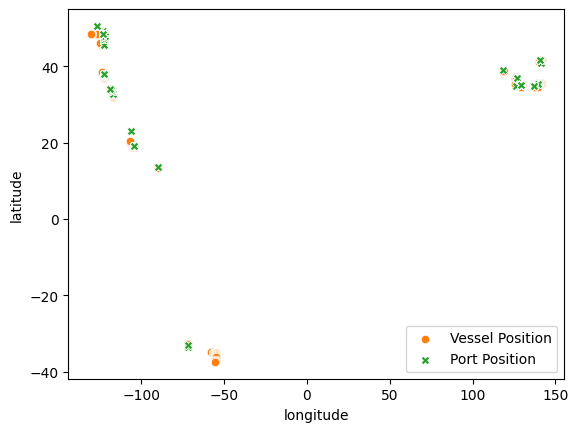

In [5]:
sns.scatterplot(data=ais_train_vessel, x='longitude', y='latitude')

# Merge ais_train_vessel with ports to get port longitude and latitude
merged_df = ais_train_vessel.merge(ports, on='portId', suffixes=('', '_port'))

# Plot the vessel positions and port positions
sns.scatterplot(data=merged_df, x='longitude', y='latitude', label='Vessel Position')
sns.scatterplot(data=merged_df, x='longitude_port', y='latitude_port', label='Port Position', marker='X')

plt.legend()
plt.show()

/var/folders/2r/r1svlpw12qzcycp2c9vw0p200000gn/T/ipykernel_43248/3731781602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_train_vessel['time'] = pd.to_datetime(ais_train_vessel['time'])


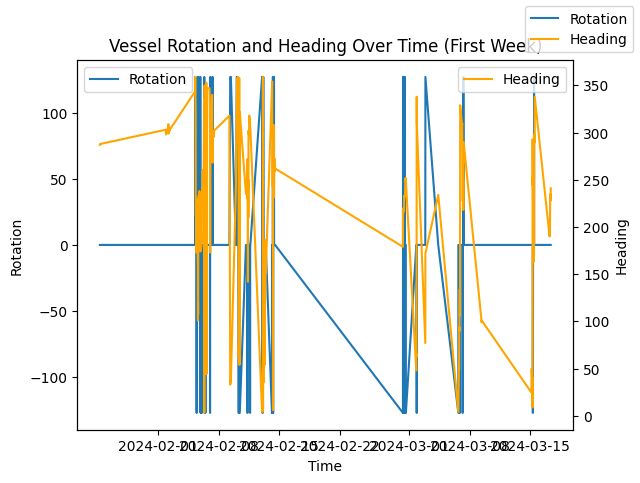

In [6]:
# Convert 'time' column to datetime
ais_train_vessel['time'] = pd.to_datetime(ais_train_vessel['time'])

# Filter data for the first week
start_date = ais_train_vessel['time'].min() + pd.Timedelta(days=21)
end_date = start_date + pd.Timedelta(days=56)
ais_train_vessel_week = ais_train_vessel[(ais_train_vessel['time'] >= start_date) & (ais_train_vessel['time'] <= end_date)]

# Plot the data for the first week
fig, ax1 = plt.subplots()

sns.lineplot(data=ais_train_vessel_week, x='time', y='rot', ax=ax1, label='Rotation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rotation')
ax1.set_title('Vessel Rotation and Heading Over Time (First Week)')

ax2 = ax1.twinx()
sns.lineplot(data=ais_train_vessel_week, x='time', y='heading', ax=ax2, color='orange', label='Heading')
ax2.set_ylabel('Heading')

fig.legend(loc='upper right')
plt.show()

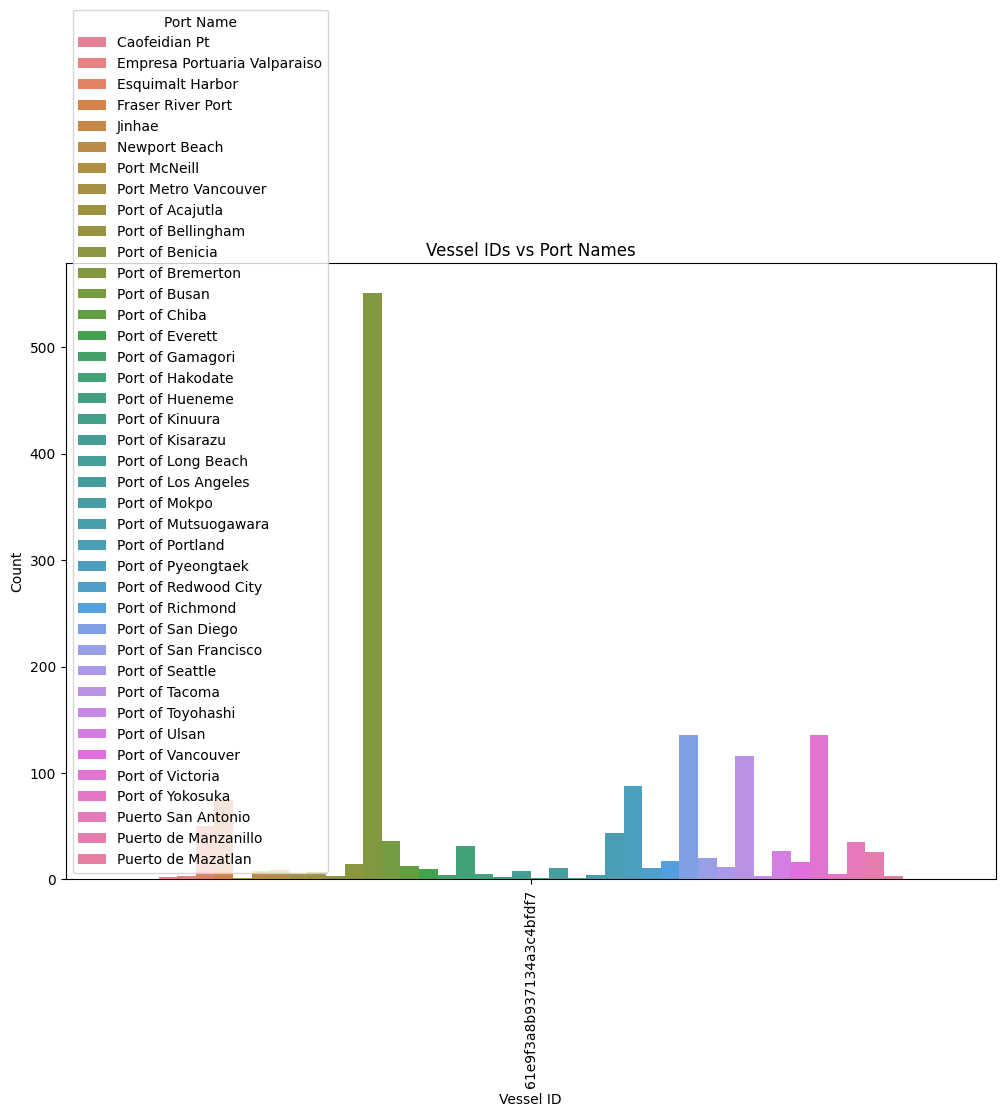

In [7]:
# Count the number of occurrences of each vesselId and port name combination
vessel_port_counts = merged_df.groupby(['vesselId', 'name']).size().reset_index(name='counts')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=vessel_port_counts, x='vesselId', y='counts', hue='name')
plt.title('Vessel IDs vs Port Names')
plt.xlabel('Vessel ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Port Name')
plt.show()

# Data Exploration 
## Checking for missing values

In [11]:
# Check for missing values

ais_train.isnull().sum()

time            0
cog             0
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64

In [12]:
ports.isnull().sum()

portId          0
name            0
portLocation    0
longitude       0
latitude        0
UN_LOCODE       0
countryName     0
ISO             0
dtype: int64

In [13]:
ais_train.describe()

,cog,sog,rot,heading,navstat,latitude,longitude
count,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06
mean,1.782494e+02,6.331703e+00,5.054561e-01,1.762737e+02,2.092604e+00,3.658497e+01,1.153646e+01
std,1.076785e+02,7.539364e+00,1.760916e+01,1.070860e+02,2.411965e+00,2.290488e+01,6.871572e+01
min,0.000000e+00,0.000000e+00,-1.270000e+02,0.000000e+00,0.000000e+00,-4.753287e+01,-1.675409e+02
25%,7.820000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,3.451683e+01,-5.212810e+00
50%,1.838000e+02,5.000000e-01,0.000000e+00,1.800000e+02,0.000000e+00,4.223370e+01,4.234350e+00
75%,2.690000e+02,1.410000e+01,0.000000e+00,2.650000e+02,5.000000e+00,5.135197e+01,1.883715e+01
max,3.600000e+02,1.023000e+02,1.280000e+02,5.110000e+02,1.500000e+01,7.055720e+01,1.788054e+02


In [14]:
ports.describe()

,longitude,latitude
count,1329.000000,1329.000000
mean,20.630528,35.146181
std,67.458101,25.098764
min,-173.300000,-53.794444
25%,-4.933000,25.920000
50%,13.933000,39.050000
75%,44.583000,53.882778
max,178.426111,71.643056


In [16]:
# Check for unique categories in 'navstat'
unique_navstat = ais_train['navstat'].unique()
print("Unique categories in 'navstat':", unique_navstat)


# Check for unique categories in 'portName'
unique_portName = ports['name'].unique()
print("Unique categories in 'portName':", unique_portName)

Unique categories in 'navstat': [ 0  1  5 15  3  2  8 12 13  4  6 14 11  7  9]
Unique categories in 'portName': ['Port of Algiers' 'Port of Annaba' 'Port of Oran' ... 'Aquaba'
 'Port of Portbury' 'Bahrain Port']


## Time-Series trends

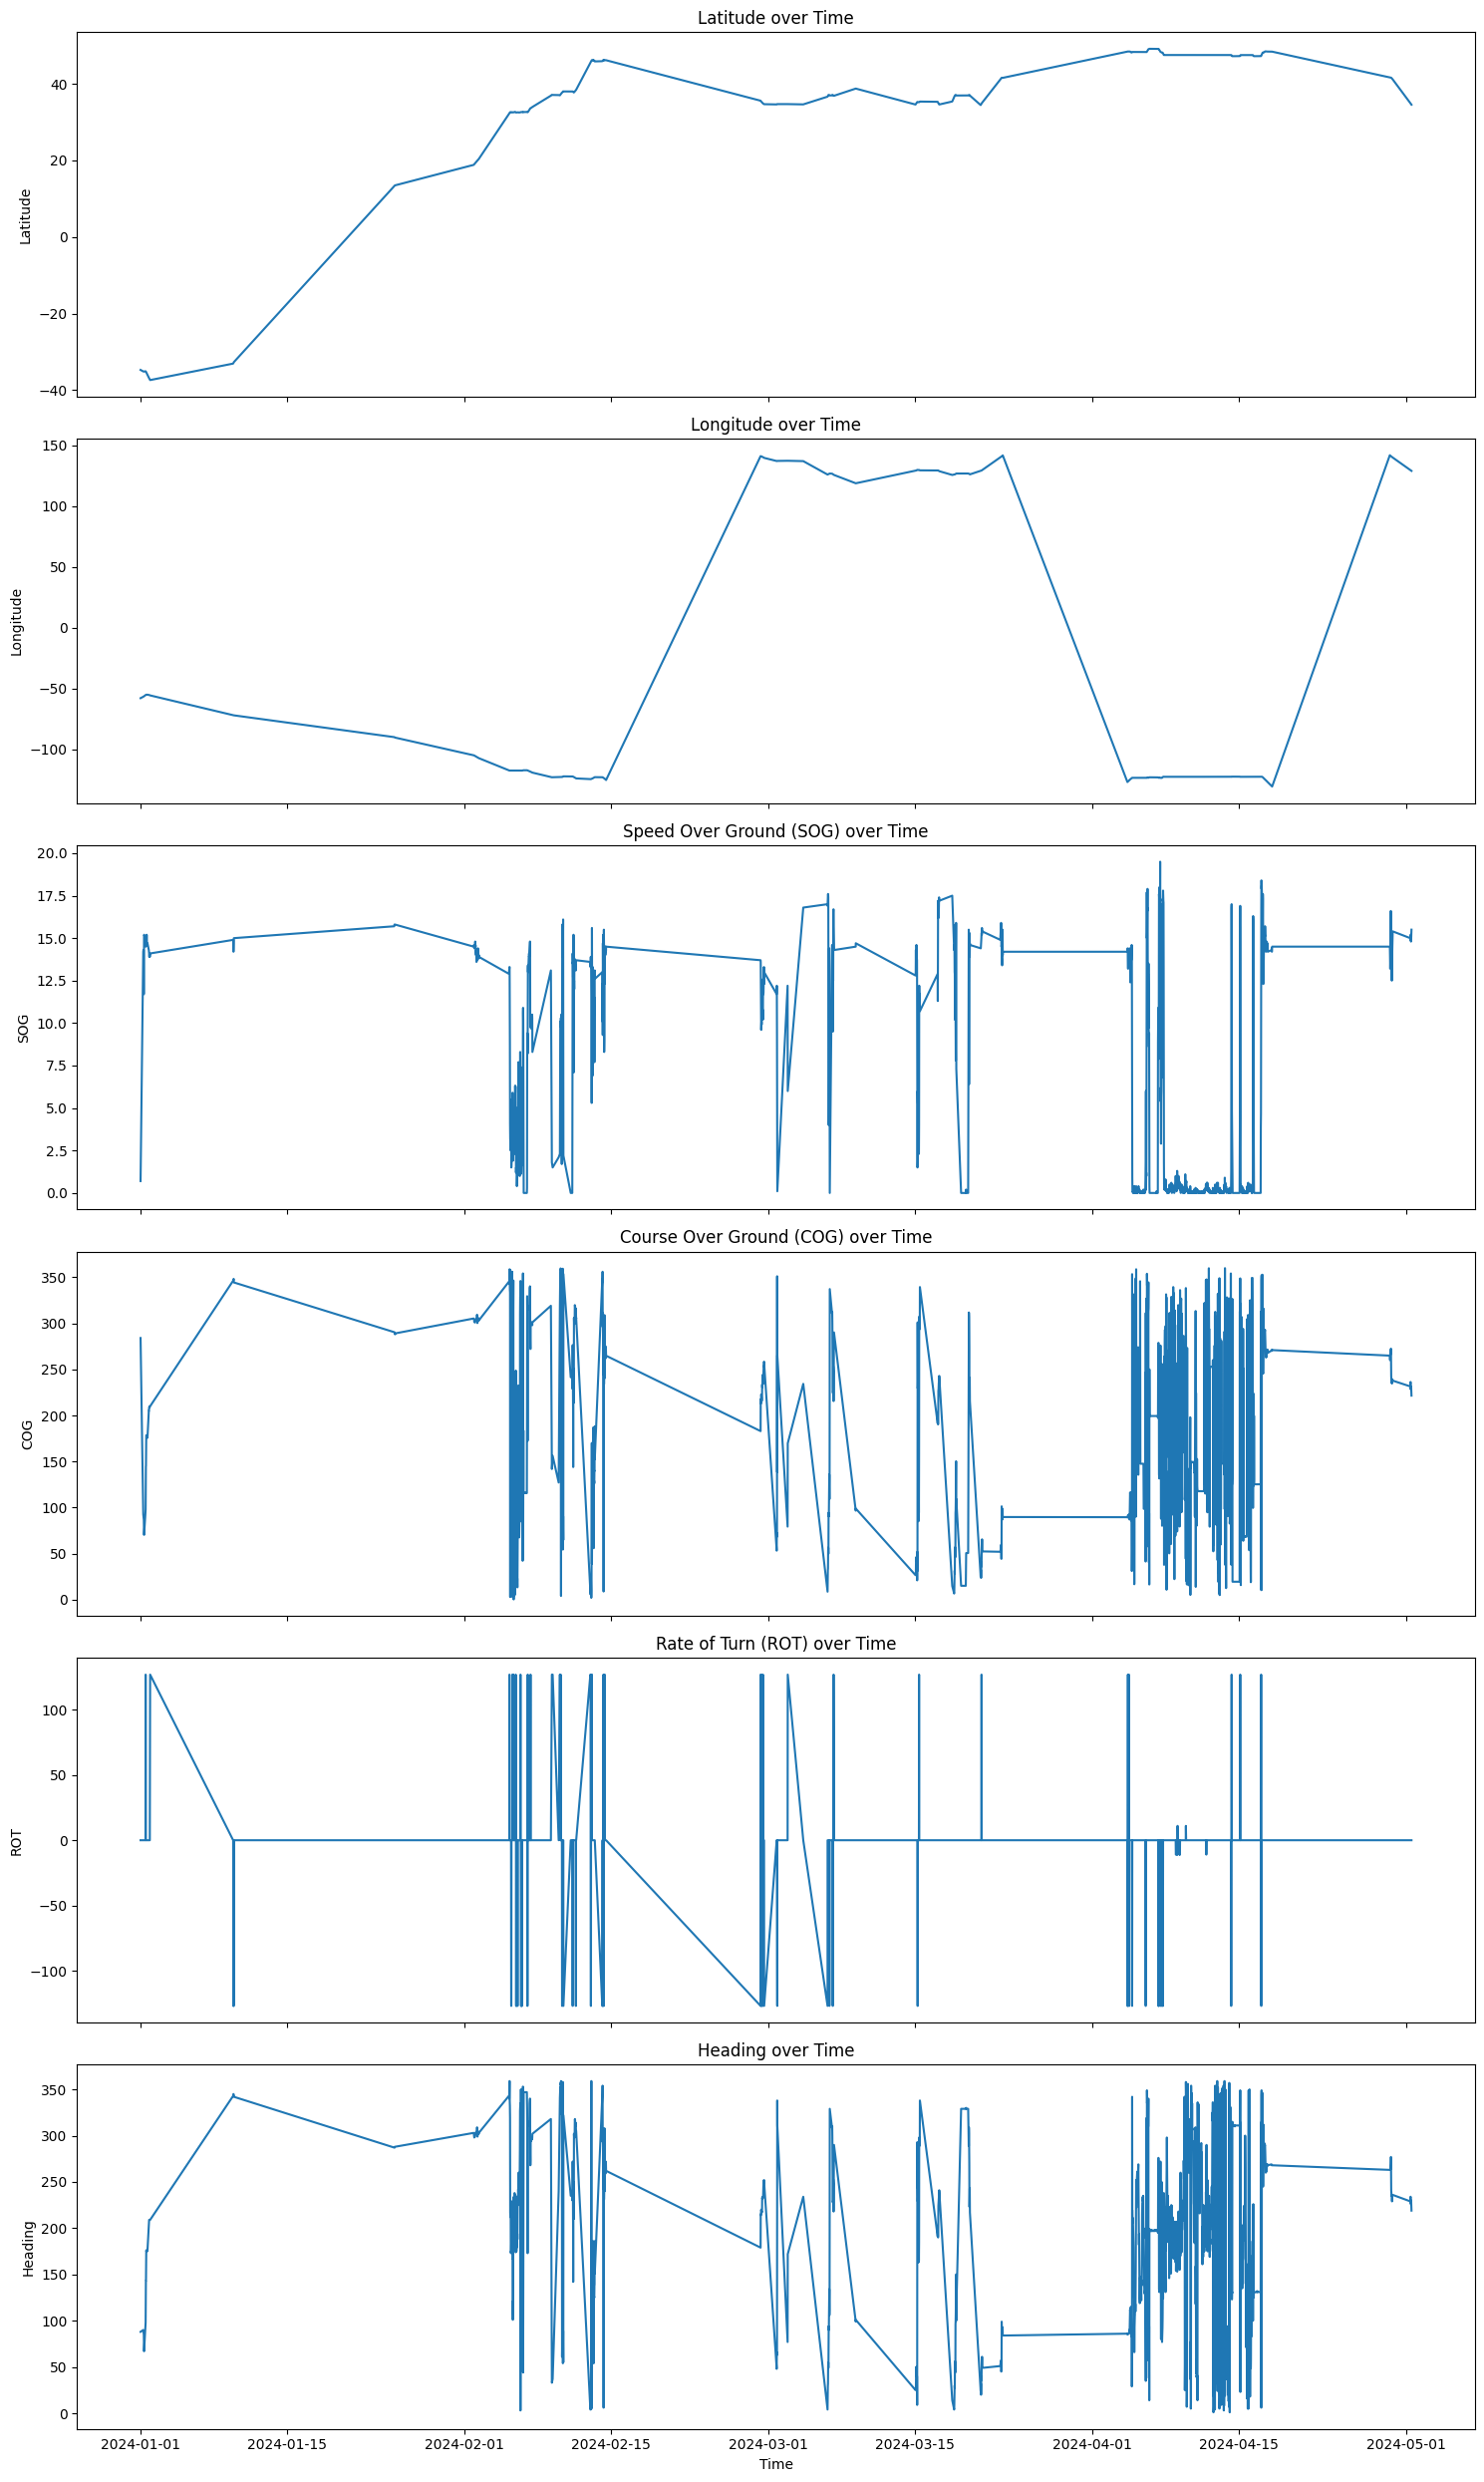

In [17]:
# Plot time series for each vessel's latitude, longitude, SOG, COG, ROT, and HEADING
fig, axes = plt.subplots(6, 1, figsize=(15, 25), sharex=True)

# Plot latitude
sns.lineplot(data=ais_train_vessel, x='time', y='latitude', ax=axes[0])
axes[0].set_title('Latitude over Time')
axes[0].set_ylabel('Latitude')

# Plot longitude
sns.lineplot(data=ais_train_vessel, x='time', y='longitude', ax=axes[1])
axes[1].set_title('Longitude over Time')
axes[1].set_ylabel('Longitude')

# Plot SOG (Speed Over Ground)
sns.lineplot(data=ais_train_vessel, x='time', y='sog', ax=axes[2])
axes[2].set_title('Speed Over Ground (SOG) over Time')
axes[2].set_ylabel('SOG')

# Plot COG (Course Over Ground)
sns.lineplot(data=ais_train_vessel, x='time', y='cog', ax=axes[3])
axes[3].set_title('Course Over Ground (COG) over Time')
axes[3].set_ylabel('COG')

# Plot ROT (Rate of Turn)
sns.lineplot(data=ais_train_vessel, x='time', y='rot', ax=axes[4])
axes[4].set_title('Rate of Turn (ROT) over Time')
axes[4].set_ylabel('ROT')

# Plot Heading
sns.lineplot(data=ais_train_vessel, x='time', y='heading', ax=axes[5])
axes[5].set_title('Heading over Time')
axes[5].set_ylabel('Heading')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

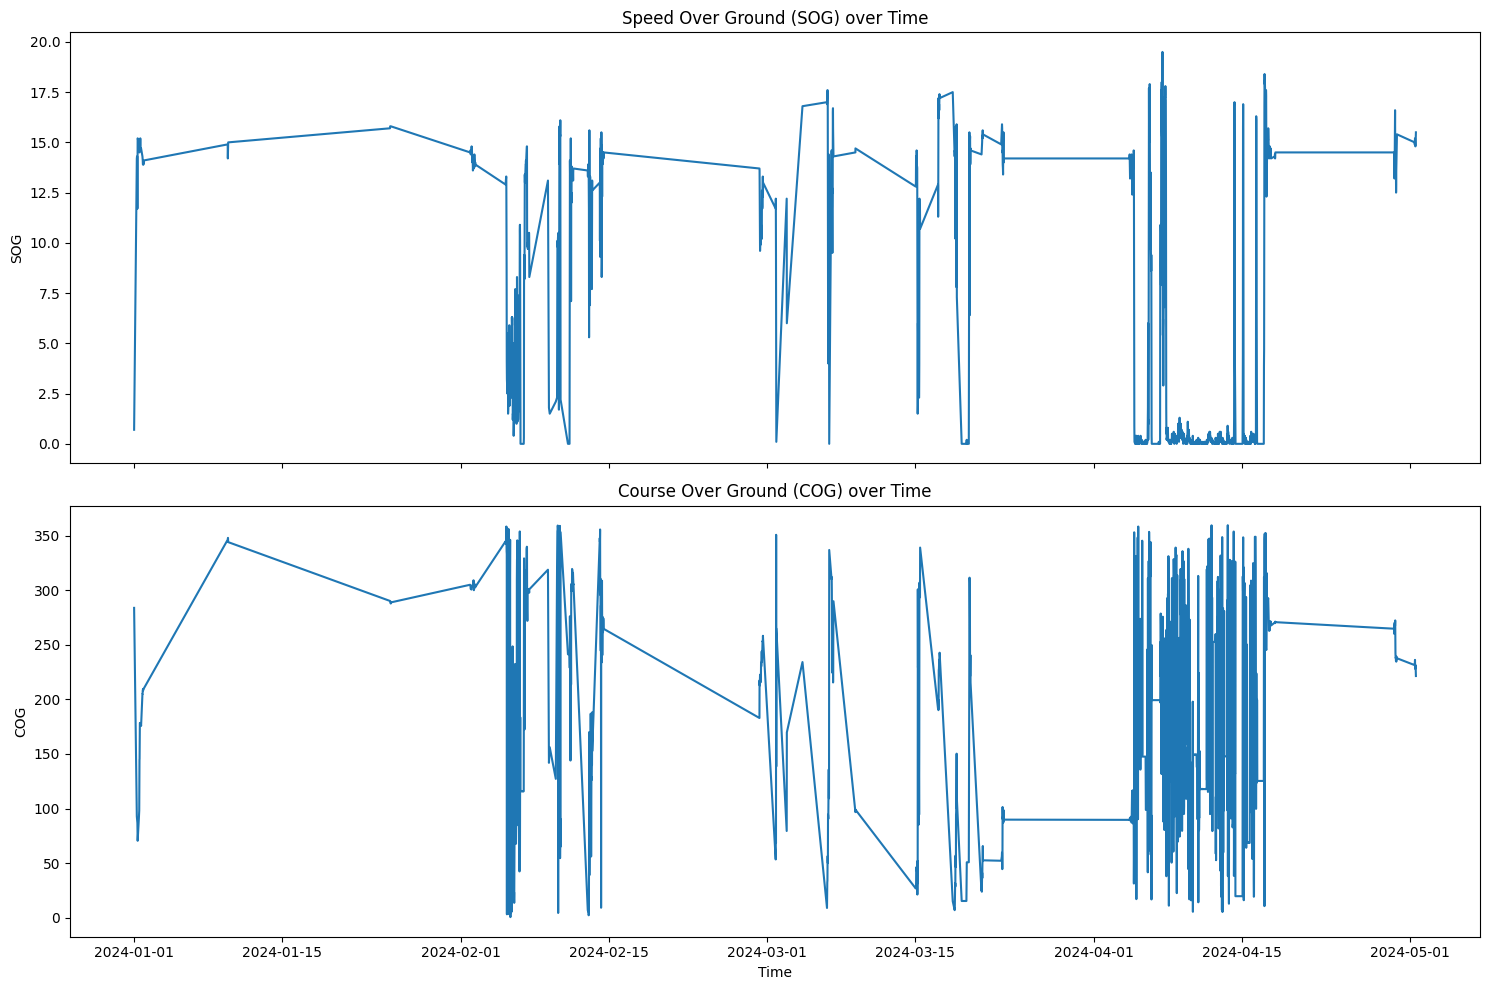

In [18]:
# Plot SOG and COG over time for each vessel
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot SOG (Speed Over Ground)
sns.lineplot(data=ais_train_vessel, x='time', y='sog', ax=axes[0])
axes[0].set_title('Speed Over Ground (SOG) over Time')
axes[0].set_ylabel('SOG')

# Plot COG (Course Over Ground)
sns.lineplot(data=ais_train_vessel, x='time', y='cog', ax=axes[1])
axes[1].set_title('Course Over Ground (COG) over Time')
axes[1].set_ylabel('COG')

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [20]:
# Identify outliers or anomalies
# SOG (Speed Over Ground) should not be greater than 102.2 knots
sog_anomalies = ais_train[ais_train['sog'] > 102.2]
print("Anomalies in SOG (Speed Over Ground):\n", sog_anomalies)

# COG (Course Over Ground) should not be greater than 360 or not available
cog_anomalies = ais_train[(ais_train['cog'] > 360) | (ais_train['cog'].isnull())]
print("Anomalies in COG (Course Over Ground):\n", cog_anomalies)

Anomalies in SOG (Speed Over Ground):
                         time    cog    sog  rot  heading  navstat  \
11660    2024-01-02 00:38:22  360.0  102.3    0      356        1   
64625    2024-01-06 13:39:05  360.0  102.3    5       60        0   
64755    2024-01-06 13:58:04  360.0  102.3    0       63        0   
64867    2024-01-06 14:02:25  360.0  102.3   10       62        0   
78470    2024-01-07 20:18:18  360.0  102.3    0      155        0   
...                      ...    ...    ...  ...      ...      ...   
1508239  2024-05-06 21:26:16  360.0  102.3    8      218        0   
1510755  2024-05-07 02:36:23  360.0  102.3    8      205        0   
1511339  2024-05-07 03:58:11  360.0  102.3    5      203        0   
1513322  2024-05-07 08:17:35  360.0  102.3    8      217        0   
1521950  2024-05-07 23:57:37  360.0  102.3    0      203        0   

              etaRaw  latitude  longitude                   vesselId  \
11660    12-28 23:00  40.95006   28.86656   61e9f446b937134a